In [1]:
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

from pylib._build_path import build_path
from pylib._make_seed_coordinates import make_seed_coordinates
from pylib._pathsplot import pathsplot
from pylib.auxlib._log_context_duration import log_context_duration
from pylib.synthgeom._AttributeBoxMax import AttributeBoxMax
from pylib.synthgeom._VideoWriter import VideoWriter
from pylib.synthgeom._generate_observations import generate_observations


In [2]:
SX, SY = 400, 400
crea_func = np.ones
crea_size = 10


In [3]:
def show_sample_observations(
    SX,
    SY,
    *,
    crea_func,
    crea_size=10,
    every_nth=5,
    fps=30.0,
    logger=print,
    num_frames=1000,
):

    observations = generate_observations(
        SX=SX,
        SY=SY,
        crea_func=crea_func,
        crea_size=crea_size,
        num_frames=num_frames,
    )
    with log_context_duration("Creating video", logger=logger):
        with VideoWriter("out.gif", fps) as vid:
            vid.add_observations(observations, every_nth=every_nth)
            vid.show()

    with log_context_duration("Creating reversed video", logger=logger):
        with VideoWriter("out.gif", fps) as vid:
            vid.add_observations(
                observations, every_nth=every_nth, reorder=reversed
            )
            vid.show()

    return observations


In [4]:
seed_coordinates = make_seed_coordinates(
    x_coords=range(SX // 8, SX, SX // 4),
    y_coords=range(SY // 8, SY, SY // 4),
)


enter log_context_duration for Creating video


gifsicle: warning: trivial adaptive palette (only 2 colors in source)


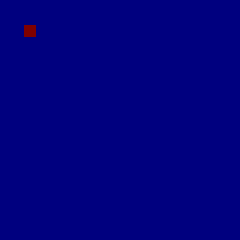

exit log_context_duration for Creating video
!!! {"Creating video": 4.440196990966797}
enter log_context_duration for Creating reversed video


gifsicle: warning: trivial adaptive palette (only 2 colors in source)


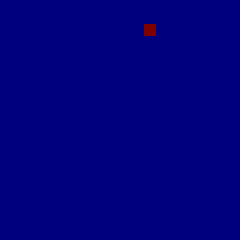

exit log_context_duration for Creating reversed video
!!! {"Creating reversed video": 4.452125072479248}


100%|██████████| 16/16 [00:01<00:00, 13.64it/s]


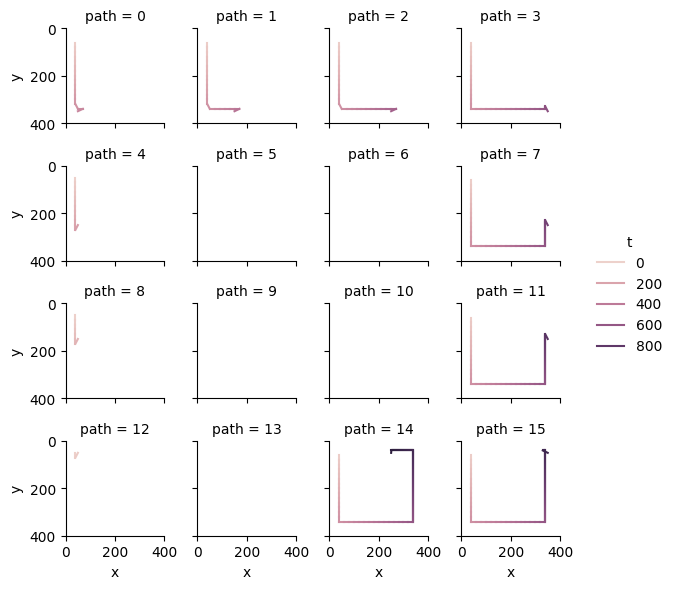

In [5]:
obvs = show_sample_observations(
    SX,
    SY,
    crea_func=np.ones,
)
observations = pathsplot(
    [
        build_path(coordinate, obvs, AttributeBoxMax(20))
        for coordinate in tqdm(seed_coordinates)
    ],
    xmax=SX,
    ymax=SY,
    col_wrap=4,
)
plt.show()


enter log_context_duration for Creating video


gifsicle: warning: trivial adaptive palette (only 204 colors in source)


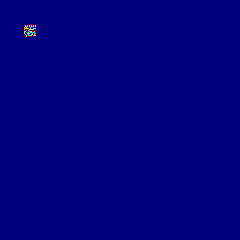

exit log_context_duration for Creating video
!!! {"Creating video": 4.749387741088867}
enter log_context_duration for Creating reversed video


gifsicle: warning: trivial adaptive palette (only 208 colors in source)


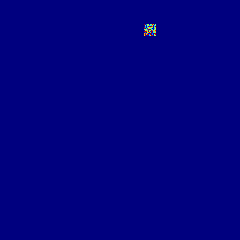

exit log_context_duration for Creating reversed video
!!! {"Creating reversed video": 4.688604831695557}


100%|██████████| 16/16 [00:01<00:00, 13.57it/s]


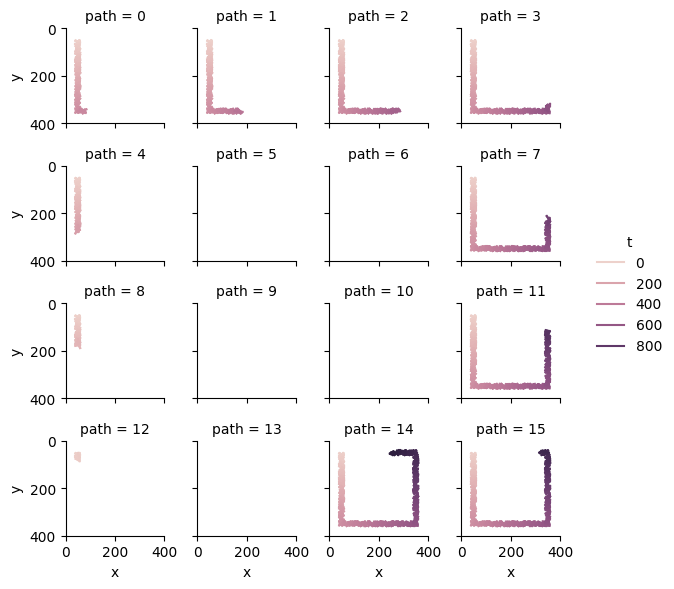

enter log_context_duration for Creating video


gifsicle: warning: trivial adaptive palette (only 210 colors in source)


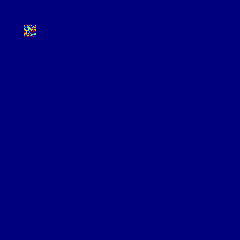

exit log_context_duration for Creating video
!!! {"Creating video": 4.808844566345215}
enter log_context_duration for Creating reversed video


gifsicle: warning: trivial adaptive palette (only 207 colors in source)


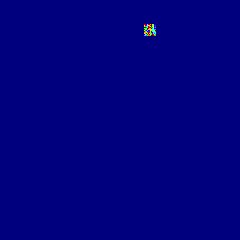

exit log_context_duration for Creating reversed video
!!! {"Creating reversed video": 4.790441989898682}


100%|██████████| 16/16 [00:01<00:00,  9.05it/s]


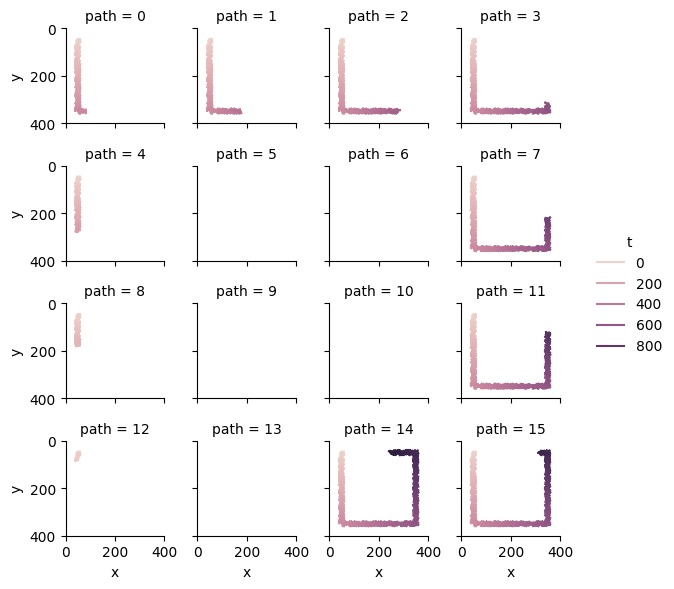

In [6]:
for i in range(2):
    obvs = show_sample_observations(
        SX,
        SY,
        crea_func=lambda x: np.random.rand(*x),
    )
    observations = pathsplot(
        [
            build_path(coordinate, obvs, AttributeBoxMax(20))
            for coordinate in tqdm(seed_coordinates)
        ],
        xmax=SX,
        ymax=SY,
        col_wrap=4,
    )
    plt.show()
